In [115]:
import sys, os
import importlib
from importlib import reload
# importlib.import_module(module_name)
sys.path.append("../../python")

import matplotlib.pyplot as plt
import numpy as np
import scipy

from simhelper import util, root, generator, parser
from simhelper import datatypes
from simhelper import helper_basic as hp
reload(parser)
reload(datatypes)

np.set_printoptions(edgeitems=30, linewidth=100000, 
    precision=3)

## Commands

Before running this test, you should go to the make_llp.ipynb to generate LLP signal.

```bash
# Suppose you are in the ./build folder of the current project.
# Make a new folder to save data for this test
data_dir=`realpath ~/geant_projects/musim_test/cosmic/`
mkdir -p $data_dir

# Run simulation + digitization + reconstruction
./_start_run_series.sh ~/geant_projects/mathusla-newsim $data_dir 100000 1 10 > log.txt
```

In [82]:
data_dir="../../../musim_test/cosmic/series_0"
fname_recon = f"{data_dir}/series_0_digi_recon.root"

In [85]:
f1 = root.tfile_reader(fname_recon)
f1.ls()

## Get metadata
f1.get_tree("metadata;2")
# f1.ls_tree()
metadata_digi = f1.get_entry(0)

f1.get_tree("data")
# f1.ls_tree()
f1.get_entry(0);
print("Total entries:", f1.entries)

None
Total entries: 853
TFile**		../../../musim_test/cosmic/series_0/series_0_digi_recon.root	
 TFile*		../../../musim_test/cosmic/series_0/series_0_digi_recon.root	
  KEY: TTree	metadata;3	Simulation metadata [current cycle]
  KEY: TTree	metadata;2	Metadata for digitization [backup cycle]
  KEY: TTree	metadata;1	Metadata for reconstruction [backup cycle]
  KEY: TTree	data;1	Reconstruction Tree


In [86]:
data = f1.get_entry(0)
print(data.keys())

dict_keys(['SimEntry', 'Track_x0', 'Track_y0', 'Track_z0', 'Track_t0', 'Track_kx', 'Track_ky', 'Track_kz', 'Track_kt', 'Track_cov', 'Track_chi2', 'Track_id', 'Track_iv_ind', 'Track_iv_err', 'Track_digiInds', 'Vertex_x0', 'Vertex_y0', 'Vertex_z0', 'Vertex_t0', 'Vertex_cov', 'Vertex_chi2', 'Vertex_id', 'Vertex_trackInds', 'Vertex_tracklet_n0', 'Vertex_tracklet_n2', 'Vertex_tracklet_n3', 'Vertex_tracklet_n4p', 'Digi_x', 'Digi_y', 'Digi_z', 'Digi_t', 'Digi_edep', 'Digi_trackID', 'Digi_pdgID', 'Digi_detectorID', 'Digi_type', 'Digi_hitInds', 'Digi_direction', 'Run_number', 'Evt_number', 'Seed_0', 'Seed_1', 'Gen_x', 'Gen_y', 'Gen_z', 'Gen_t', 'Gen_px', 'Gen_py', 'Gen_pz', 'Gen_pdgID', 'Gen_index'])


55


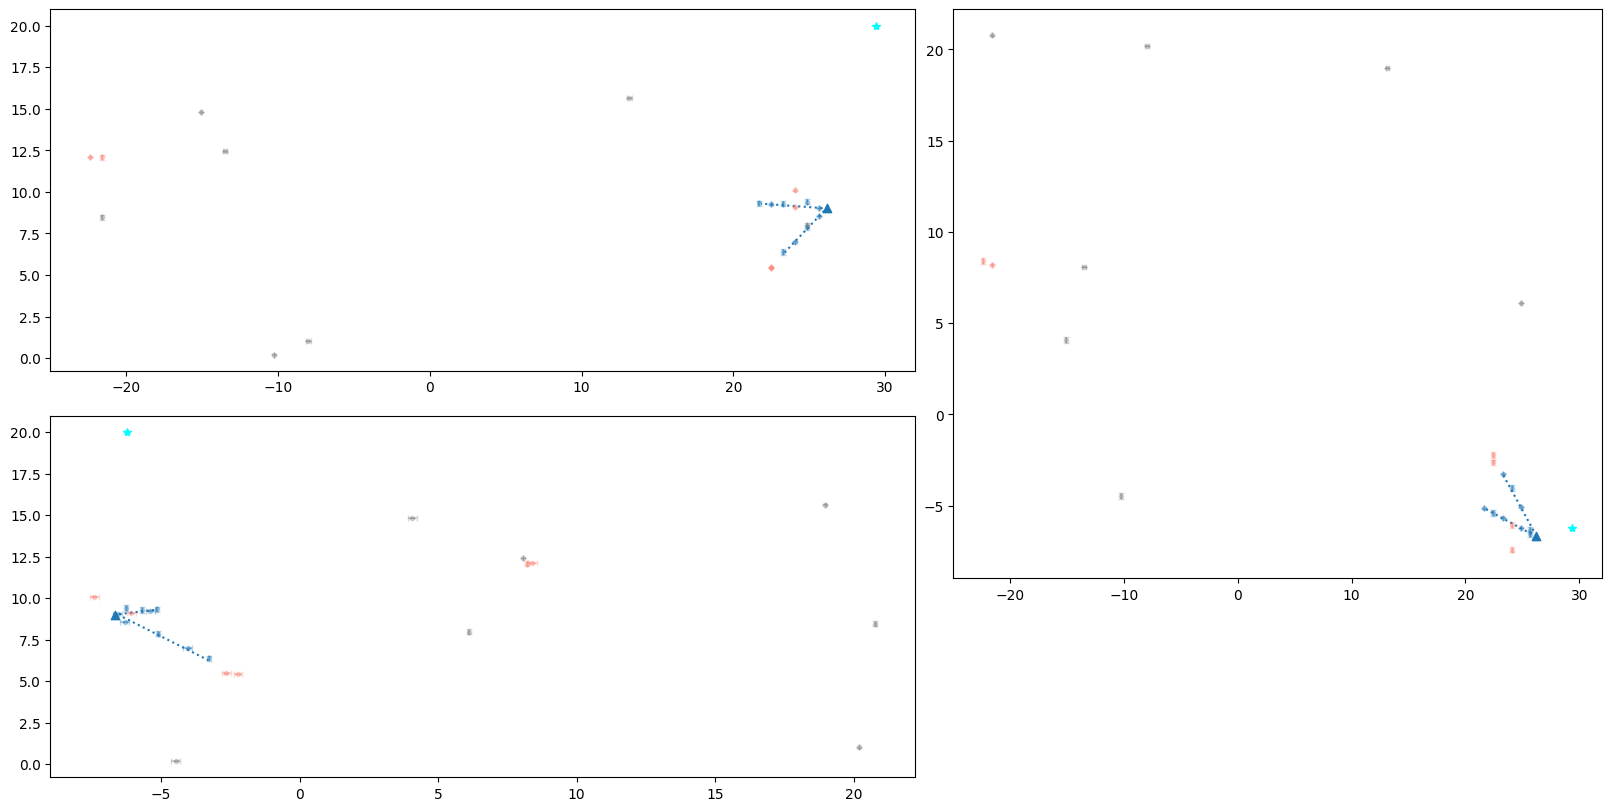

In [143]:
# i=0
i+=1
print(i)

data = f1.get_entry(i)
event = datatypes.Event(data, metadata_digi)  
event.plot()